<a href="https://colab.research.google.com/github/julieinsan/tidyTuesdayHorrorMovies/blob/main/Tidy_Tuesday_Horror_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
dta = pd.read_csv("/content/drive/MyDrive/TidyTuesdayHorror/horror_movies.csv")

In [4]:
import seaborn as sns
dta.head()

,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,vote_count,vote_average,budget,revenue,runtime,status,adult,backdrop_path,genre_names,collection,collection_name
0,760161,Orphan: First Kill,Orphan: First Kill,en,After escaping from an Estonian psychiatric fa...,There's always been something wrong with Esther.,2022-07-27,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,5088.584,902,6.9,0,9572765,99,Released,False,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,"Horror, Thriller",760193.0,Orphan Collection
1,760741,Beast,Beast,en,A recently widowed man and his two teenage dau...,Fight for family.,2022-08-11,/xIGr7UHsKf0URWmyyd5qFMAq4d8.jpg,2172.338,584,7.1,0,56000000,93,Released,False,/2k9tBql5GYH328Krj66tDT9LtFZ.jpg,"Adventure, Drama, Horror",NaN,NaN
2,882598,Smile,Smile,en,"After witnessing a bizarre, traumatic incident...","Once you see it, it’s too late.",2022-09-23,/hiaeZKzwsk4y4atFhmncO5KRxeT.jpg,1863.628,114,6.8,17000000,45000000,115,Released,False,/mVNPfpydornVe4H4UCIk7WevWjf.jpg,"Horror, Mystery, Thriller",NaN,NaN
3,756999,The Black Phone,The Black Phone,en,"Finney Blake, a shy but clever 13-year-old boy...",Never talk to strangers.,2022-06-22,/lr11mCT85T1JanlgjMuhs9nMht4.jpg,1071.398,2736,7.9,18800000,161000000,103,Released,False,/AfvIjhDu9p64jKcmohS4hsPG95Q.jpg,"Horror, Thriller",NaN,NaN
4,772450,Presencias,Presences,es,A man who loses his wife and goes to seclude h...,NaN,2022-09-07,/dgDT3uol3mdvwEg0jt1ble3l9hw.jpg,1020.995,83,7.0,0,0,0,Released,False,/ojfzhdwRemcDt1I6pao6vVLw9AA.jpg,Horror,NaN,NaN


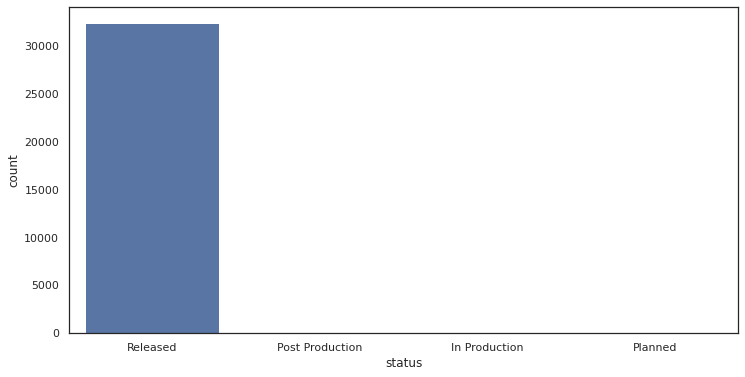

In [15]:

sns.set(rc={"figure.figsize":(12,6)})
sns.set_theme(style="white")
sns.countplot(x=dta.status)